## About data
Dataset from 1988 combining Cleveland, Hungary, Switzerland, and Long Beach V databases. 

Contains 76 attributes, with experiments using 14 key features. 

Target variable: heart disease presence (0 = no disease, 1 = disease).

Attributes:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol (mg/dl)
6. fasting blood sugar > 120 mg/dl
7. resting ECG results (0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak (ST depression: exercise vs rest)
11. ST segment slope at peak exercise
12. major vessels count (0-3) by fluoroscopy
13. thal: normal (0), fixed defect (1), reversible defect (2)

Note: Patient identifiers replaced with dummy values.

## Imports and loading

In [99]:
# imports
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# stat tests
from scipy.stats import shapiro, probplot

# data modelling
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV


# models
from sklearn.linear_model import LogisticRegression

In [100]:
# Read csv into panda
dataset = pd.read_csv('./heart.csv')

## EDA

In [101]:
# First few rows
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [102]:
# basic row info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [103]:
# Descriptive stats
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [104]:
# Check for missing values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [105]:
# Global plot settings
# sns.set_palette('Reds')

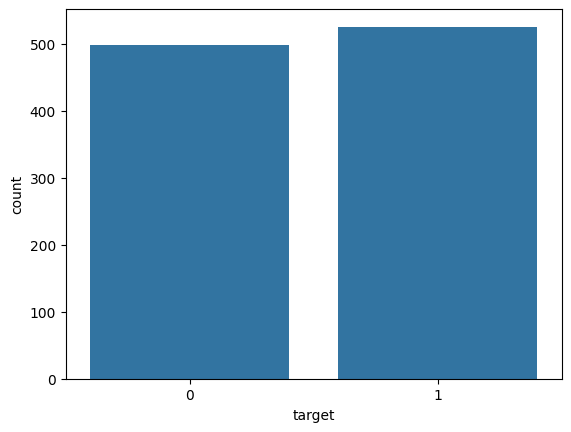

In [106]:
# Target dist - class balance
sns.countplot(data=dataset, x='target')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

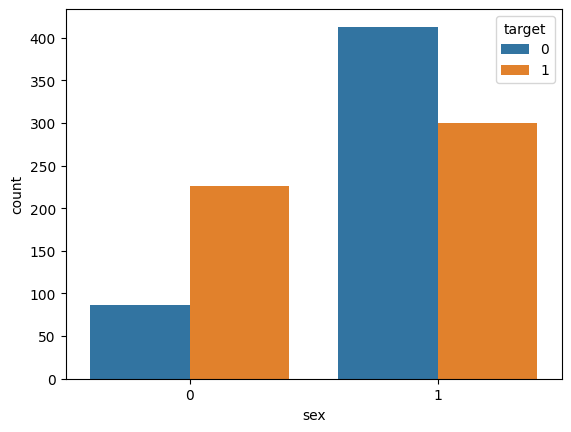

In [107]:
# Target dist - discriminated by sex 
sns.countplot(data=dataset, x='sex', hue='target')

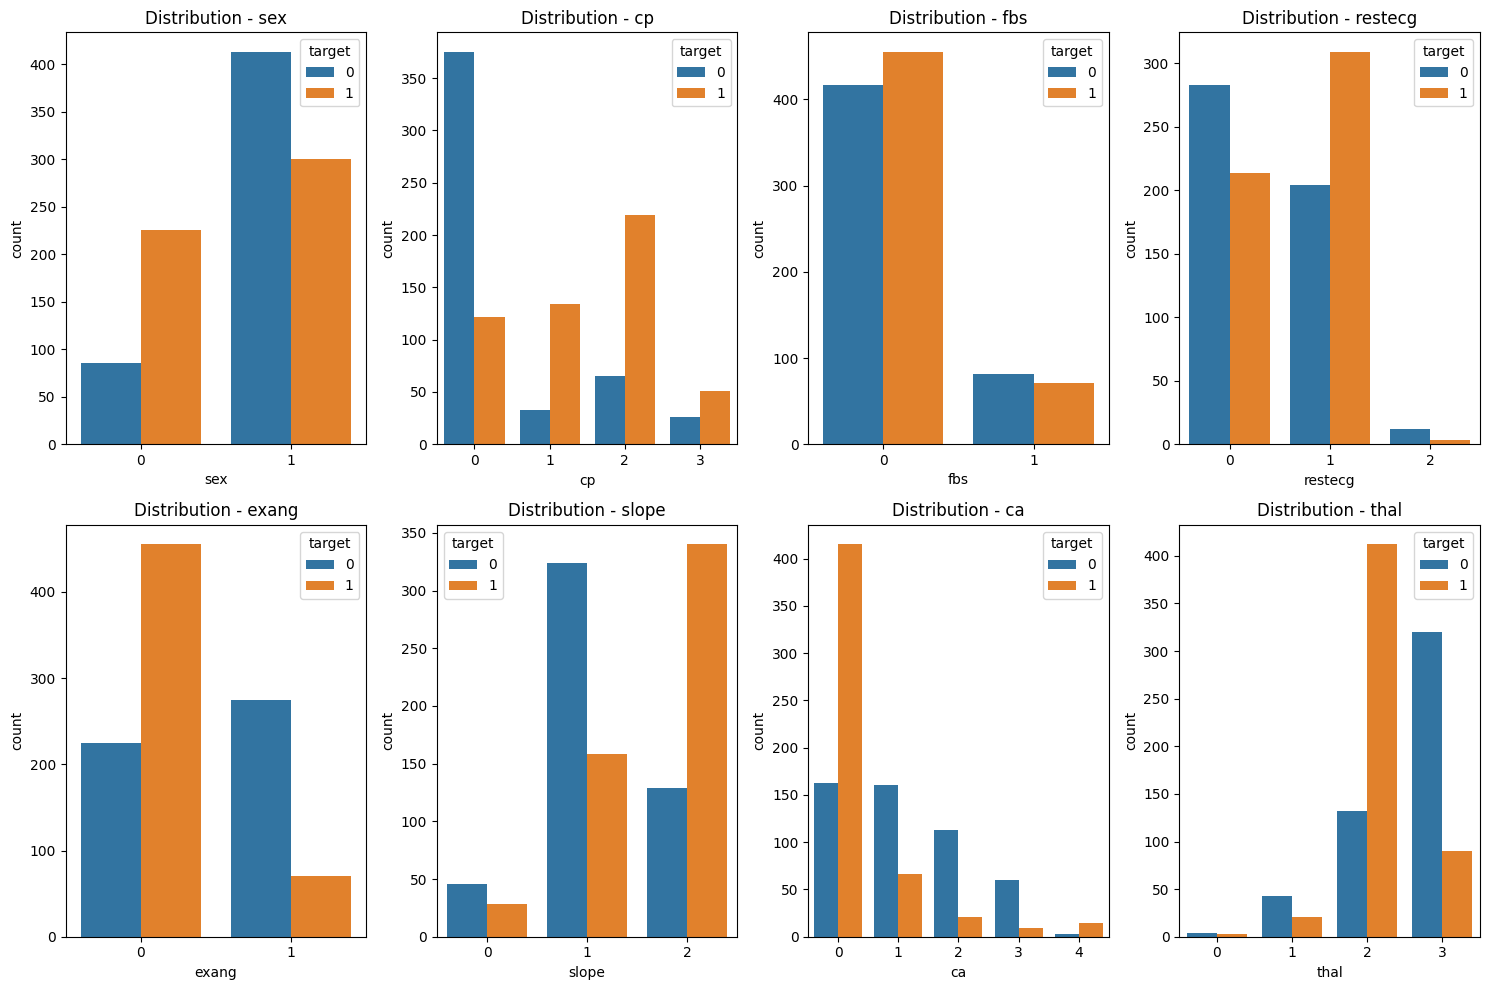

In [108]:
# Count plots for visual assessment of distribution
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
for col, ax in zip(categorical_cols, axes.flat):
    sns.countplot(data=dataset, x=col, hue='target', ax=ax)
    ax.set_title(f'Distribution - {col}')

plt.tight_layout()
plt.show()

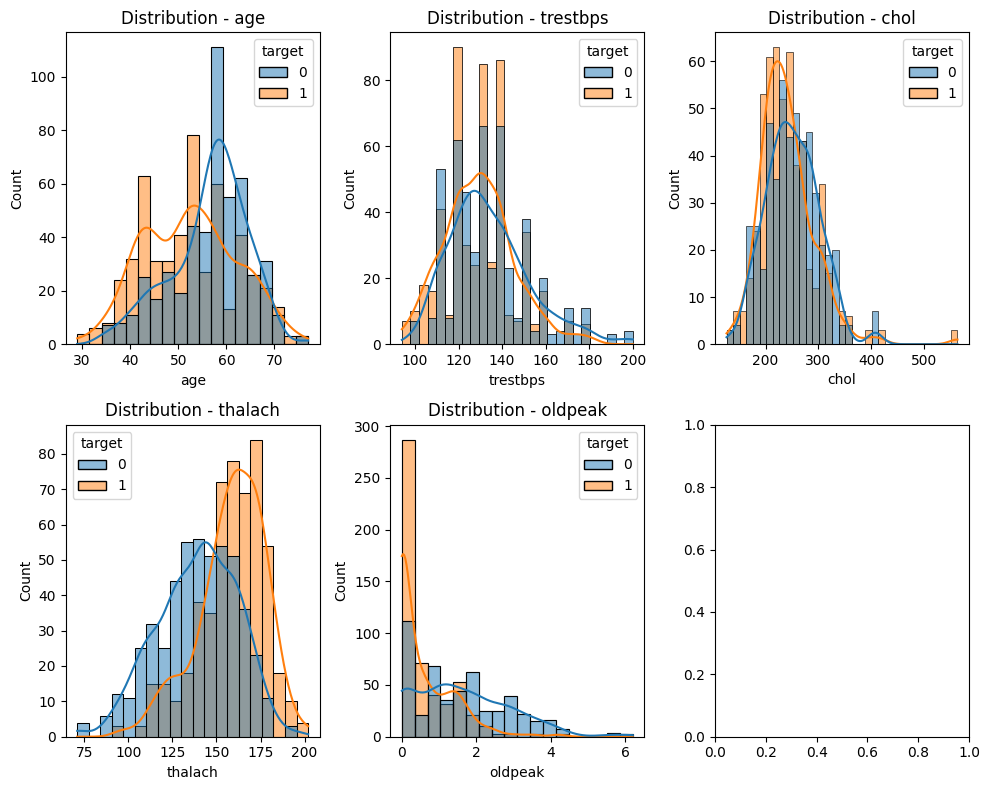

In [109]:
# Hist plots for visual assessment of distribution
continuous_cols= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(10,8))
for col, ax in zip(continuous_cols, axes.flat):
    sns.histplot(data=dataset, x=col, hue='target', kde=True, ax=ax)
    ax.set_title(f'Distribution - {col}')

plt.tight_layout()
plt.show()

Continuous features contain a lot of outliers, especially *trestbps*, *chol* columns

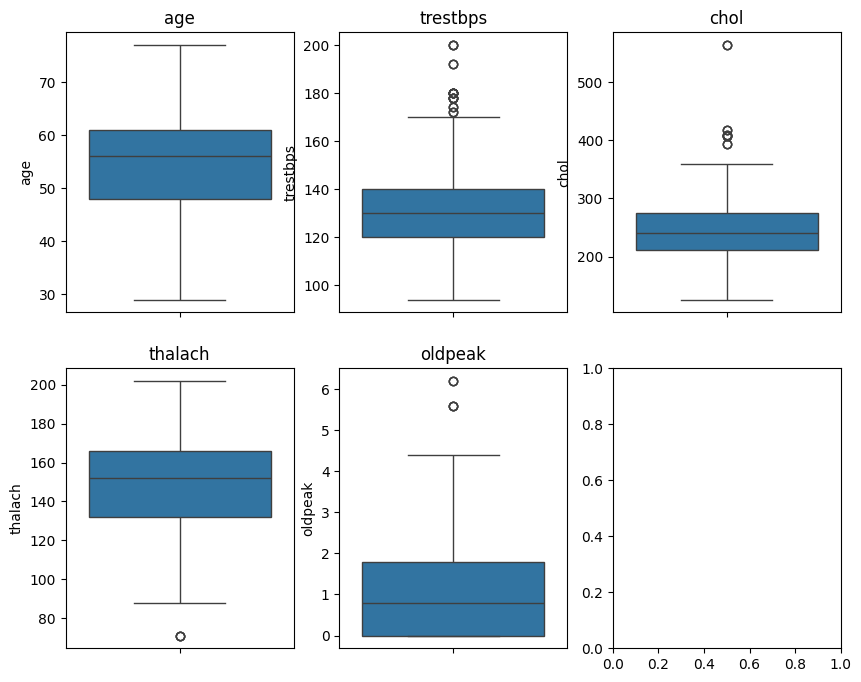

In [110]:
# Boxplots for outlier detection 
fig, axes = plt.subplots(2, 3, figsize=(10,8))

for col, ax in zip(continuous_cols, axes.flat):
    sns.boxplot(data=dataset, y=col, ax=ax)
    ax.set_title(col)

plt.show()

Confirmed histplot findings from before using normality tests

In [111]:
# Shapiro-wilk for normality test
for col in continuous_cols:   
   shapiro_test = shapiro(dataset[col])
   print(shapiro_test)

   # interpret results
   alpha = 0.05
   if shapiro_test.pvalue > alpha:
      print('Normal distribution (fail to reject H0)')
   else:
      print('Another distributions (reject H0)')

ShapiroResult(statistic=np.float64(0.9843618203367189), pvalue=np.float64(5.038685420061504e-09))
Another distributions (reject H0)
ShapiroResult(statistic=np.float64(0.9633115656373303), pvalue=np.float64(2.1942341435732163e-15))
Another distributions (reject H0)
ShapiroResult(statistic=np.float64(0.9502231492570404), pvalue=np.float64(4.000062978093735e-18))
Another distributions (reject H0)
ShapiroResult(statistic=np.float64(0.9774048593848365), pvalue=np.float64(1.550333343988599e-11))
Another distributions (reject H0)
ShapiroResult(statistic=np.float64(0.8502536845152217), pvalue=np.float64(4.6685467599581855e-30))
Another distributions (reject H0)


QQ-plots suggest that the distribution is good enough for normality assumption (despite normality test rejecting $H_0$)

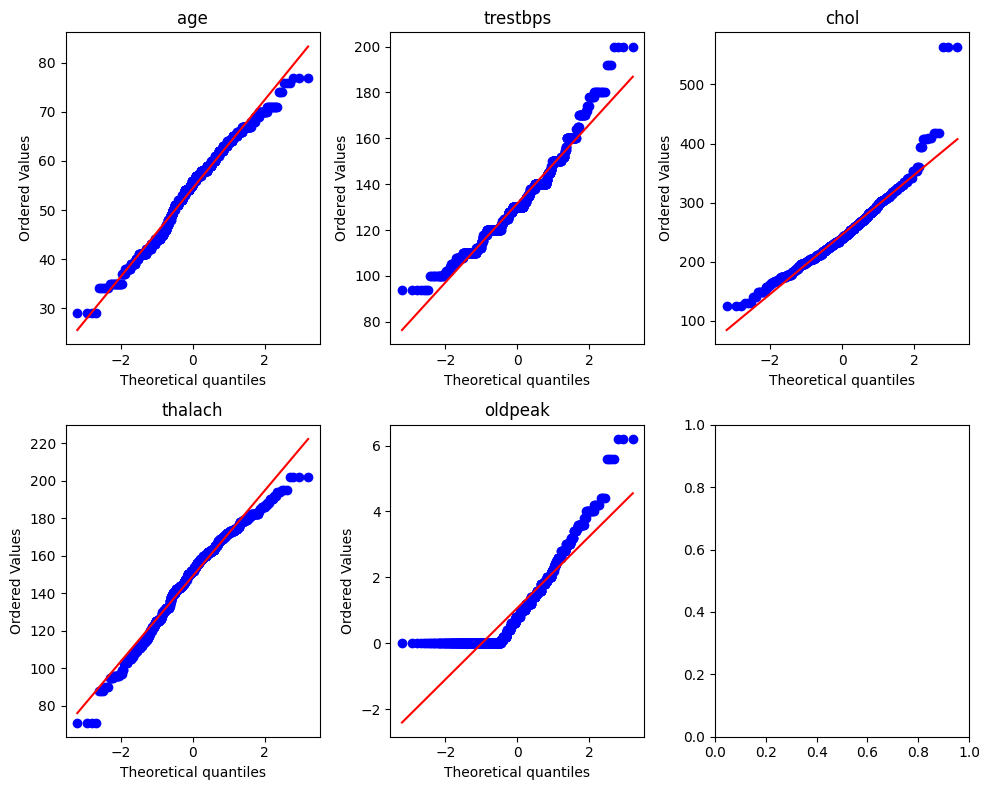

In [112]:
# QQ-plots for visual assessment of normality
fig, axes = plt.subplots(2, 3, figsize=(10,8))
for col, ax in zip(continuous_cols, axes.flat):
   probplot(dataset[col], dist="norm", plot=ax)
   ax.set_title(col)

plt.tight_layout()
plt.show()

Heatmap confirms no significant multi-colinearity

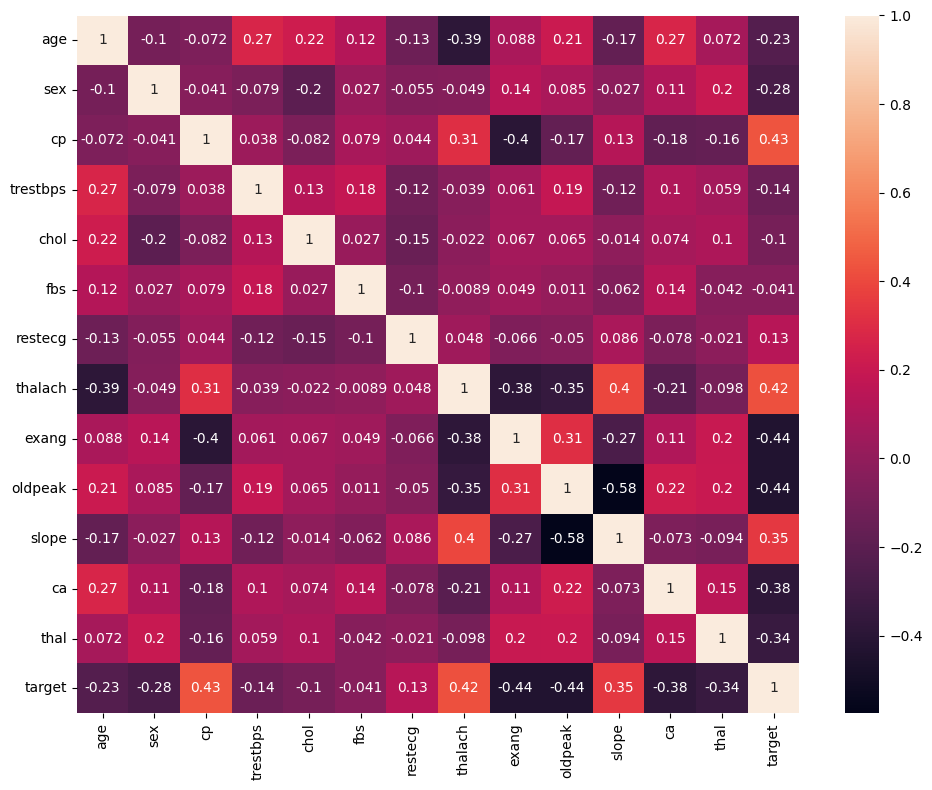

In [113]:
# Heatmap of the dataset features
plt.figure(figsize=(10, 8))
sns.heatmap(data=dataset.corr(),
            annot=True)

plt.tight_layout()
plt.show()

## Data preprocessing

Apply robust scaler on continuous features given large number of outliers

In [114]:
# Robust scaler
scaler = RobustScaler()

dataset_scaled = dataset.copy()

dataset_scaled[continuous_cols] = scaler.fit_transform(dataset[continuous_cols])

## Models

In [115]:
# Split into predictors and target
X = dataset_scaled.drop('target', axis=1)
y = dataset_scaled['target']

In [116]:
# Split into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=1125,
    stratify=y
)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((820, 13), (205, 13), (820,), (205,))

### Logistic regression

#### $ P(Y=1|X) = \frac{1}{1 + e^{-(β_0 + β_1X_1 + ... + β_pX_p)}} $

Assumptions:
* Linearity
* Independence of observations
* No perfect multicollinearity
* No extreme outliers in predictors (RobustScaler)

In [118]:
# Logistic regression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

In [119]:
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1125)

metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(
    LogisticRegression(),
    X,
    y,
    cv=cv,
    scoring=metrics
)

for metric in metrics:
    scores = cv_results[f'test_{metric}']
    print(f"{metric}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

accuracy: 0.847 (+/- 0.027)
precision: 0.820 (+/- 0.034)
recall: 0.899 (+/- 0.039)
f1: 0.858 (+/- 0.024)


In [120]:
# Get predictions
y_pred = model.predict(X_test)

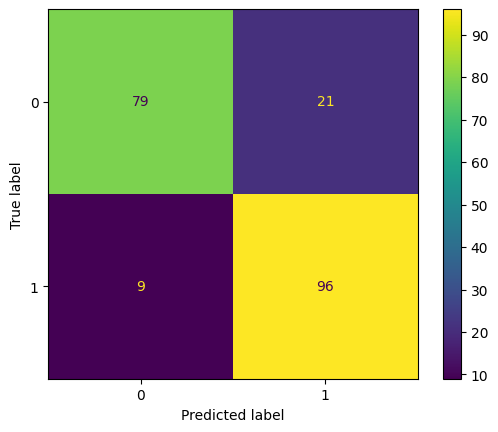

In [121]:
# Confusion matrix
log_cm = confusion_matrix(y_test , y_pred,labels = lr.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=lr.classes_)

log_disp.plot()
plt.show()

In [122]:
# Accuracy metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       100
           1       0.82      0.91      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



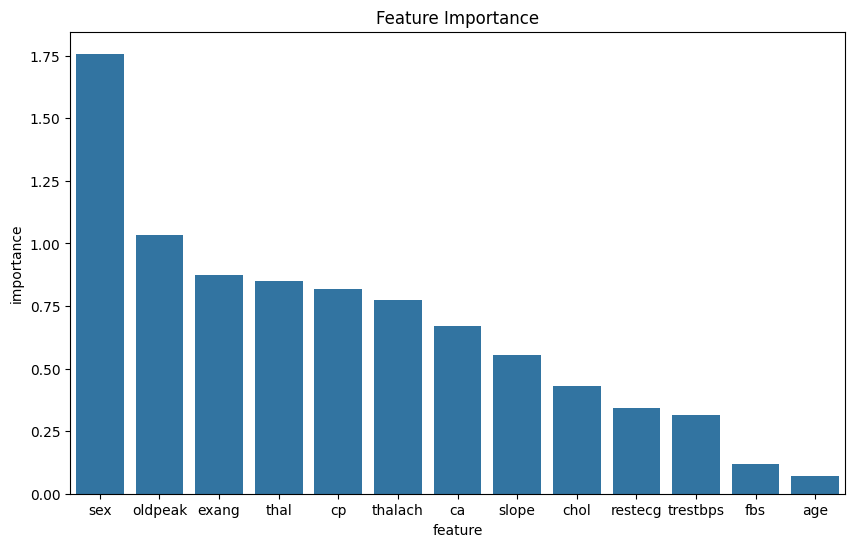

In [123]:
# LR coefficients
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='feature', y='importance' )
plt.title('Feature Importance')
plt.show()